# Lending Club Case Study


## Introduction
This assignment will give us an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

<b> Loan accepted: </b> If the company approves the loan, there are 3 possible scenarios described below:

<b>-> Fully paid: </b> Applicant has fully paid the loan (the principal and the interest rate)

<b>-> Current: </b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

<b>-> Charged-off: </b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

<b> Loan rejected:</b> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
-> If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

-> In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Import all the necessary libraries needed for the case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Reading the dataset from the csv file
loan = pd.read_csv("loan.csv")

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Steps To Follow 

1. Undertand the data dictionary.
2. Data cleaning or Data pre processing should be done.
3. If null values present over a certain threshold value then need to remove it.
4. Do Univariate analysis on the data.
5. Next is to do bivariate analysis.
6. If needed perform multivariate analysis.

## Data Cleaning / Data Preparing

In [7]:
missing = loan.isnull().sum()

In [8]:
print(missing.to_string())

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [9]:
missing_percent = missing * 100 / len(loan)
missing_df = pd.DataFrame({'column_name': loan.columns, 'missing_percent': missing_percent.round(2)})

In [10]:
print(missing_df.to_string())

                                                   column_name  missing_percent
id                                                          id             0.00
member_id                                            member_id             0.00
loan_amnt                                            loan_amnt             0.00
funded_amnt                                        funded_amnt             0.00
funded_amnt_inv                                funded_amnt_inv             0.00
term                                                      term             0.00
int_rate                                              int_rate             0.00
installment                                        installment             0.00
grade                                                    grade             0.00
sub_grade                                            sub_grade             0.00
emp_title                                            emp_title             6.19
emp_length                              

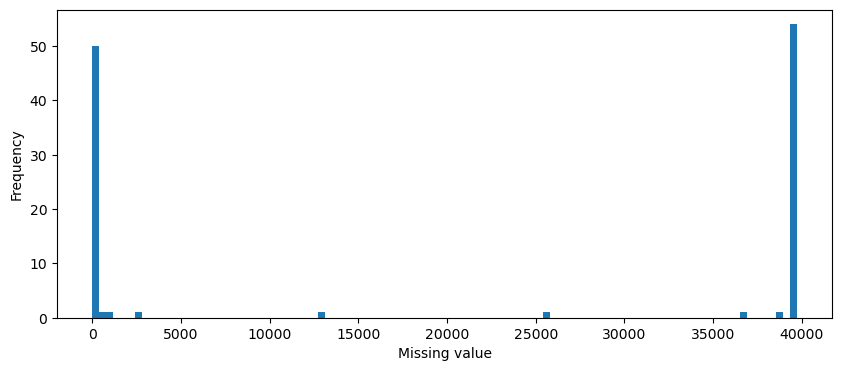

In [11]:
missing.plot(kind='hist', bins=100, figsize = (10,4))
plt.xlabel('Missing value')
plt.show()

In [12]:
# From from the histo we can see that colums have all NULL values are more than 50
(missing_df['missing_percent'] == 100.00).sum()

54

In [13]:
# Clearly we can see that colums having all NULL values are 54 
# we need to find those columns and remove it because they are of no use to us.
# we shall remove all the columns have NULL values more than 80 percent

all_value_missing_columns = missing_df[(missing_df['missing_percent'] >= 80.00)].column_name.tolist()
all_value_missing_columns

['mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percen

In [14]:
# Dropping the above listed columns 
null_columns_dropped_loan = loan.drop(all_value_missing_columns, axis=1)

In [15]:
#Initially there was 111 columns now after removing all null values no of columns is redced
null_columns_dropped_loan.shape

(39717, 55)

In [16]:
loan = null_columns_dropped_loan

In [17]:
# we have directly removed columns with missing vaules equal or ablove 80 percent
# Now we will look other columns missing percentage
(loan.isnull().sum()/len(loan.index))*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [18]:
# From above we can see only 2 columns having missing values above 10 percent , those are desc and mths_since_last_delinq.
# From data dictionary 
# desc -> Loan description provided by the borrower
# mths_since_last_delinq -> The number of accounts on which the borrower is now delinquent.
loan['desc'].head(20)

0       Borrower added on 12/22/11 > I need to upgra...
1       Borrower added on 12/22/11 > I plan to use t...
2                                                   NaN
3       Borrower added on 12/21/11 > to pay for prop...
4       Borrower added on 12/21/11 > I plan on combi...
5                                                   NaN
6       Borrower added on 12/18/11 > I am planning o...
7       Borrower added on 12/16/11 > Downpayment for...
8       Borrower added on 12/21/11 > I own a small h...
9       Borrower added on 12/16/11 > I'm trying to b...
10      Borrower added on 12/15/11 > I had recived a...
11                                                  NaN
12      Borrower added on 12/15/11 > Plan to pay off...
13      Borrower added on 12/19/11 > I intend to pay...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17      Borrower added on 12/15/11 > Payoff othe

In [19]:
loan['mths_since_last_delinq'].head(20)

0      NaN
1      NaN
2      NaN
3     35.0
4     38.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16    61.0
17     NaN
18     8.0
19     NaN
Name: mths_since_last_delinq, dtype: float64

In [20]:
# Dropping both colurmns because of their missing values and our interest.
dropping_list =['desc','mths_since_last_delinq']
loan = loan.drop(dropping_list, axis=1)

In [21]:
loan.shape

(39717, 53)

<br>
<br>

## Data Manipulation / Data preparation

### Categorical columns and Numeric columns

In [22]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [23]:
# we can get the list of categorical columns and Numeric columns

categorical_columns = loan.select_dtypes(include=['object']).columns.tolist()
numeric_columns = loan.select_dtypes(exclude=['object']).columns.tolist()

In [24]:
categorical_columns

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [25]:
numeric_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [26]:
#Preparing 'term' column
loan['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [27]:
loan['term'] = loan['term'].str.rstrip('months')
loan['term'].value_counts()

 36     29096
 60     10621
Name: term, dtype: int64

In [28]:
# Preparing 'int_rate' column
loan['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [29]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [30]:
# Preparing 'emp_length' column
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [31]:
loan['emp_length'] = loan['emp_length'].str.rstrip('years ')
loan['emp_length'].replace({'10+': '10'}, inplace=True)
loan['emp_length'][loan['emp_length'] == '< 1'] = '0.5'
loan['emp_length'].value_counts()

10     8879
0.5    4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length, dtype: int64

In [32]:
# Preparing 'revol_util' column

loan['revol_util'].value_counts()
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['revol_util'].value_counts()

0        977
0.20      63
63        62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

## Derived Metrics


In [33]:
# Preparing 'emp_length' column

loan['issue_d'].value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [34]:
month, year = loan['issue_d'].str.split('-').str
loan['issue_m'] = month
loan['issue_y'] = pd.to_numeric(year)
loan.drop(columns=['issue_d'], inplace=True)

In [35]:
loan['issue_y'].value_counts()

11    21656
10    11532
9      4716
8      1562
7       251
Name: issue_y, dtype: int64

In [36]:
loan['issue_m'].value_counts()

Dec    4433
Nov    4167
Oct    3934
Sep    3648
Aug    3518
Jul    3476
Jun    3279
May    2999
Apr    2834
Mar    2692
Jan    2379
Feb    2358
Name: issue_m, dtype: int64

In [37]:
# Preparing 'earliest_cr_line' column

loan['earliest_cr_line'].value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [38]:
month, year = loan['earliest_cr_line'].str.split('-').str
loan['earliest_cr_line_m'], loan['earliest_cr_line_y'] = loan['earliest_cr_line'].str.split('-').str
loan['earliest_cr_line_m'].value_counts()
loan.drop(columns=['earliest_cr_line'], inplace=True)

In [39]:
loan['earliest_cr_line_y'].value_counts()

00    3250
99    2968
98    2851
01    2521
97    2456
96    2274
95    2150
94    2027
02    1927
03    1856
04    1761
93    1514
05    1493
06    1169
92    1063
90    1038
91     980
89     861
88     740
07     712
87     618
86     500
85     461
84     409
83     338
82     224
81     187
80     180
79     165
78     165
08     159
77     115
76      97
75      83
73      66
74      65
72      53
70      48
71      46
69      37
68      20
67      18
66      11
63      10
64       9
65       9
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line_y, dtype: int64

In [40]:
# same like 'earliest_cr_line' we are treating 'last_credit_pull_d' and 'last_pymnt_d'
loan['last_credit_pull_m'], loan['last_credit_pull_y'] = loan['last_credit_pull_d'].str.split('-').str
loan['last_pymnt_m'], loan['last_pymnt_y'] = loan['last_pymnt_d'].str.split('-').str
loan.drop(columns=['last_credit_pull_d', 'last_pymnt_d'], inplace=True)

In [41]:
loan_status_percent = loan['loan_status'].value_counts()
loan_status_percent

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [42]:
numeric_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

### Converting the column type to required form 


In [43]:
# Convering the column type to required form 
loan[numeric_columns] = loan[numeric_columns].astype(np.float)
category_to_numeric = ['emp_length', 'int_rate', 'revol_util']
loan[category_to_numeric] = loan[category_to_numeric].astype(np.float)

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  float64
 1   member_id                   39717 non-null  float64
 2   loan_amnt                   39717 non-null  float64
 3   funded_amnt                 39717 non-null  float64
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [45]:
#'last_credit_pull_y', 'last_pymnt_y'
category_to_int = ['term', 'issue_y', 'earliest_cr_line_y', 'total_acc']
loan[category_to_int] = loan[category_to_int].astype(np.int)

In [46]:
#delete columns which we may not use in the analysis
del_cols = ['url', 'zip_code', 'emp_title', 'out_prncp', 'out_prncp_inv']
loan.drop(columns=del_cols, inplace=True)
loan.shape

(39717, 52)

In [47]:
categorical_columns = loan.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status',
 'application_type',
 'issue_m',
 'earliest_cr_line_m',
 'last_credit_pull_m',
 'last_credit_pull_y',
 'last_pymnt_m',
 'last_pymnt_y']

In [48]:
# after converting to int and float 
# we can also change datatype of some columns to category
columns_to_category = ['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'addr_state']
loan[columns_to_category] = loan[columns_to_category].astype('category')

In [49]:
loan['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: category
Categories (3, object): ['Charged Off', 'Current', 'Fully Paid']

In [50]:
# we can remove the loan status which is current becuase we can analyse the risk when the tenure is not completed
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 52)

## Exploratory data analysis (EDA)

we have cleaned and data and prepared it for the analysis . We can perform exploratory data analysis on the data now.

### 1. Univariate Analysis

Our given problem statement is to find the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 

To start with we can analysis loan status first so that we can get to know howm many have completed and charged off.


In [51]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec_bankruptcies,tax_liens,issue_m,issue_y,earliest_cr_line_m,earliest_cr_line_y,last_credit_pull_m,last_credit_pull_y,last_pymnt_m,last_pymnt_y
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,0.0,0.0,Dec,11,Jan,85,May,16,Jan,15
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,0.0,0.0,Dec,11,Apr,99,Sep,13,Apr,13
2,1077175.0,1313524.0,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,0.0,0.0,Dec,11,Nov,1,May,16,Jun,14
3,1076863.0,1277178.0,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,0.0,0.0,Dec,11,Feb,96,Apr,16,Jan,15
5,1075269.0,1311441.0,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,...,0.0,0.0,Dec,11,Nov,4,Jan,16,Jan,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187.0,92174.0,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,...,NaN,NaN,Jul,7,Nov,90,Jun,10,Jul,10
39713,90665.0,90607.0,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,...,NaN,NaN,Jul,7,Dec,86,Jul,10,Jul,10
39714,90395.0,90390.0,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,...,NaN,NaN,Jul,7,Oct,98,Jun,07,Apr,08
39715,90376.0,89243.0,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,...,NaN,NaN,Jul,7,Nov,88,Jun,07,Jan,08


### a) loan_status

In [52]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

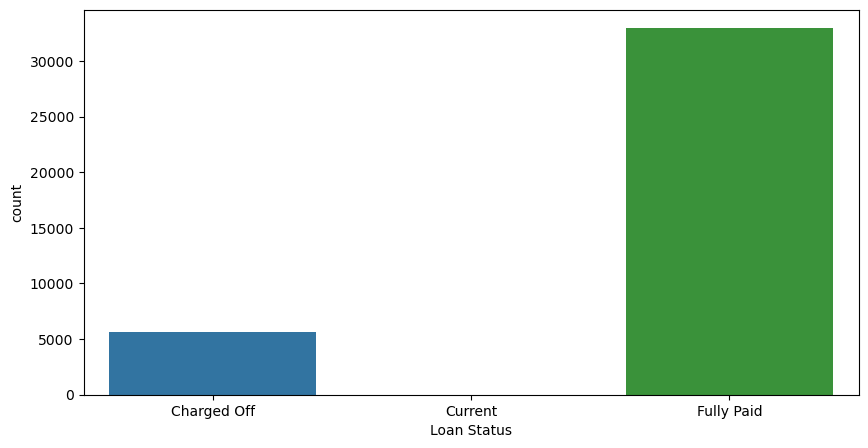

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x= loan["loan_status"])
plt.xlabel('Loan Status')
plt.show()

In [54]:
loan['loan_status'].value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Current        0.000000
Name: loan_status, dtype: float64

###  <font color='red'>a) <u>loan status insights</u></font>
        - > From loan status we get to know that 5627 loans have been chargedoff
        - > nearly 14.5 percent loans are charge off excluding current loans 

### b) loan_amnt

In [55]:
# Next we can analysis the loan amount 
loan["loan_amnt"].value_counts(ascending=True)

22550.0       1
16350.0       1
11075.0       1
29175.0       1
26250.0       1
           ... 
15000.0    1838
6000.0     1886
5000.0     2028
12000.0    2248
10000.0    2809
Name: loan_amnt, Length: 870, dtype: int64

In [56]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

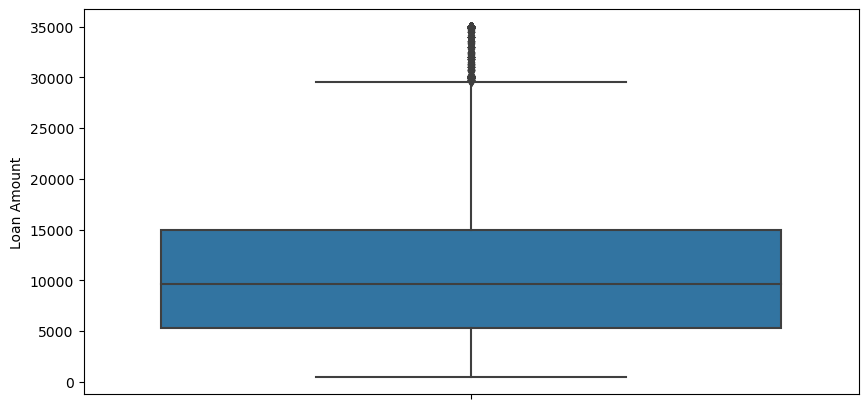

In [57]:
# from the box plot we can get the distribution of the loan amount and outliers
plt.figure(figsize=(10,5))
sns.boxplot( y=loan["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

###  <font color='red'>b) <u>loan amnt insights</u></font>
    - > Loan amount varies from 500 to 35000
    - > 10,000 is the most given loan amount it is given for 2248

### c) emp_length

In [58]:
# Next we can analyse the employe experience 
# we have considered < 1 as  0.5 as already 1 is present and >10 as 10 for easier understanding
loan['emp_length'].value_counts(ascending=True)

9.0     1226
8.0     1435
7.0     1711
6.0     2168
1.0     3169
5.0     3194
4.0     3342
3.0     4012
2.0     4291
0.5     4508
10.0    8488
Name: emp_length, dtype: int64

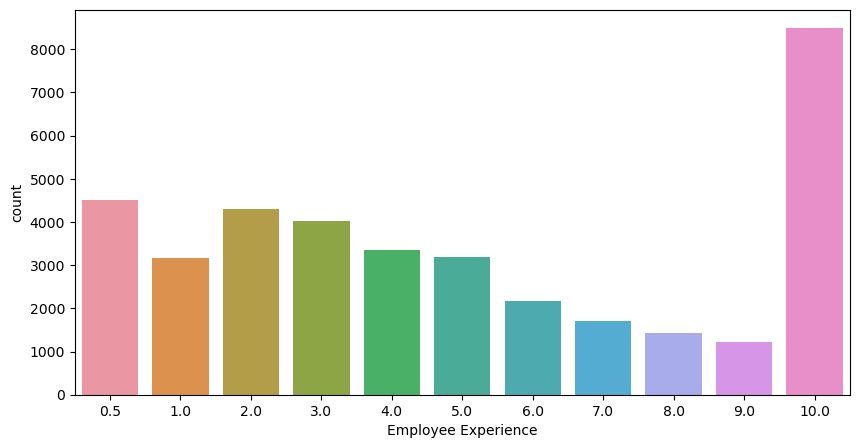

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan)
plt.xlabel('Employee Experience')
plt.show()

###  <font color='red'>c) <u>emp length insights</u></font>
    - > Majority of the people who have taken loan have more that 10 years of work experience. 
    - > Minority of the people who have taken loan have 9 years of work experience.


### d) grade


In [60]:
# Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's 
# credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. 

loan['grade'].value_counts(ascending=True)

G      299
F      976
E     2663
D     5085
C     7834
A    10045
B    11675
Name: grade, dtype: int64

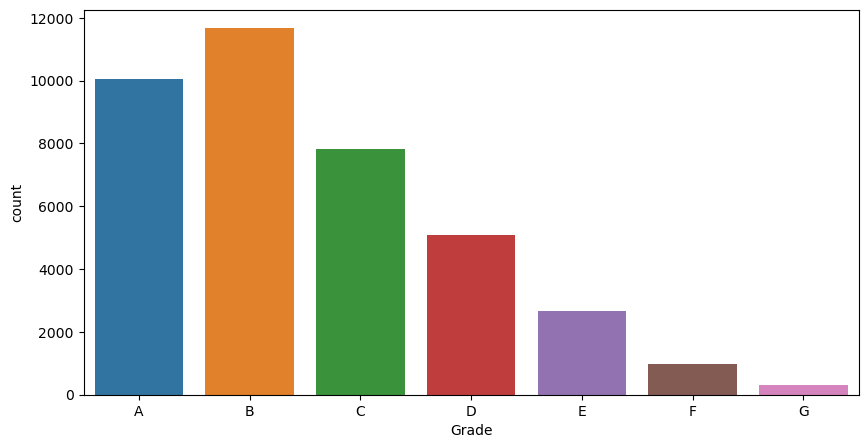

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=loan)
plt.xlabel('Grade')
plt.show()

###  <font color='red'>d) <u>grade insights</u></font>
    - > Majority of the loans have grades A & B i.e 10045 and 11675 respectively. 
    - > Minority of the loans have grades G i.e 299
    - > Therefore most of the loans are graded high.

### e) annual_inc


In [62]:
loan['annual_inc'].value_counts(ascending=True)

80640.0       1
43344.0       1
71028.0       1
57770.0       1
9192.0        1
           ... 
30000.0     808
45000.0     811
40000.0     855
50000.0    1029
60000.0    1466
Name: annual_inc, Length: 5215, dtype: int64

In [63]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [64]:
loan['annual_inc_lakhs'] = loan['annual_inc'] / 1000

In [65]:
loan['annual_inc_lakhs'].describe()

count    38577.000000
mean        68.777974
std         64.218682
min          4.000000
25%         40.000000
50%         58.868000
75%         82.000000
max       6000.000000
Name: annual_inc_lakhs, dtype: float64

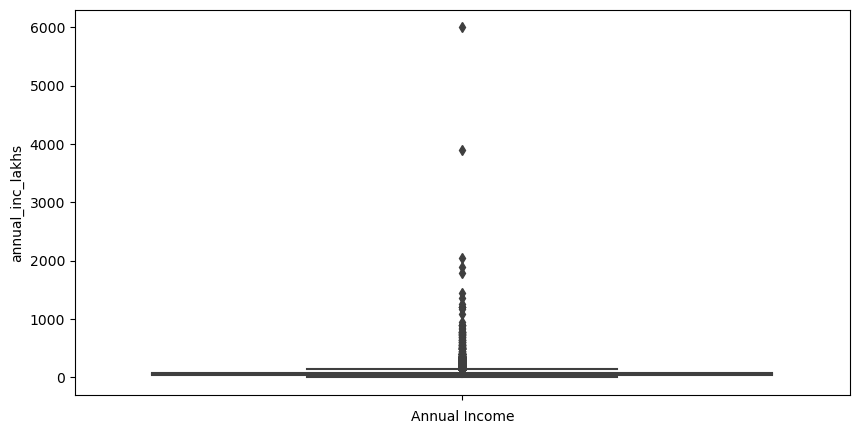

In [99]:
plt.figure(figsize=(10,5))
sns.boxplot(y=loan['annual_inc_lakhs'])
plt.xlabel('Annual Income')
plt.show()

In [106]:
#From the above plot we get to know that most of the sal lies below 2000
#Now we can categories the salary for our easier understandng based on the amount.

def categorize_annual_income(sal):
    if sal <= 50000:
        return 'low'
    elif sal > 50000 and sal <=100000:
        return 'medium'
    else:
        return 'high'
   

loan['annual_inc_cat'] = loan['annual_inc'].apply(lambda x: categorize_annual_income(x))

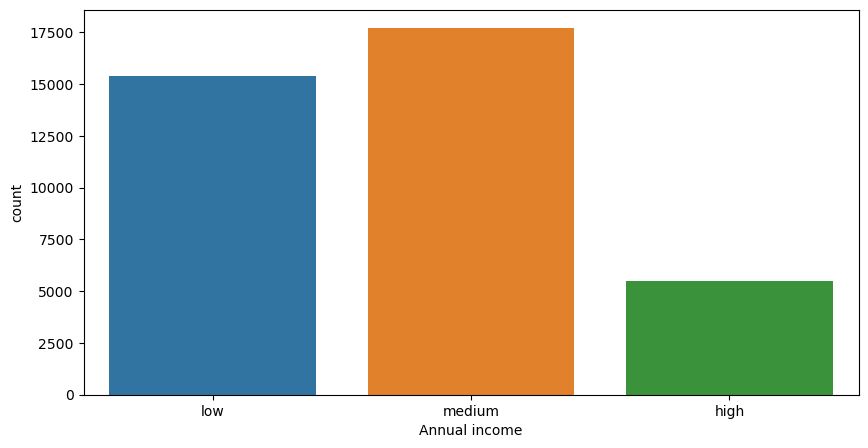

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(x='annual_inc_cat', data=loan)
plt.xlabel('Annual income')
plt.show()

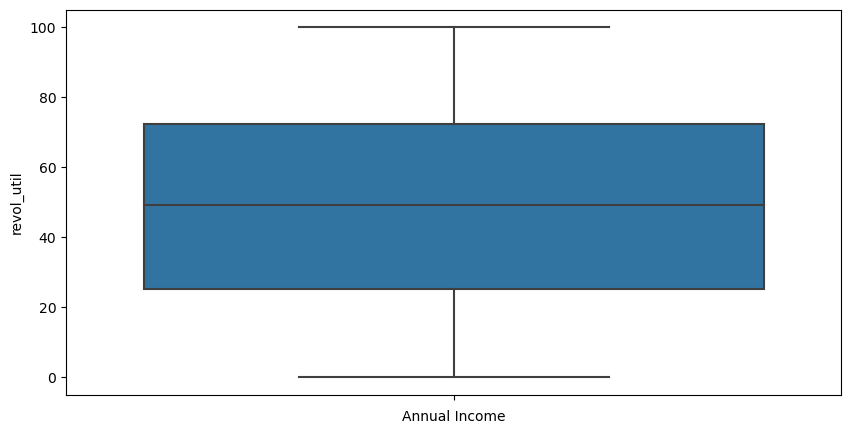

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(y=loan['revol_util'])
plt.xlabel('Annual Income')
plt.show()

###  <font color='red'>e)<u> annual inc insights</u></font>
    - > There are only few people above income 20L which are outliers
    - > Majority of the loans given to medium sal people 

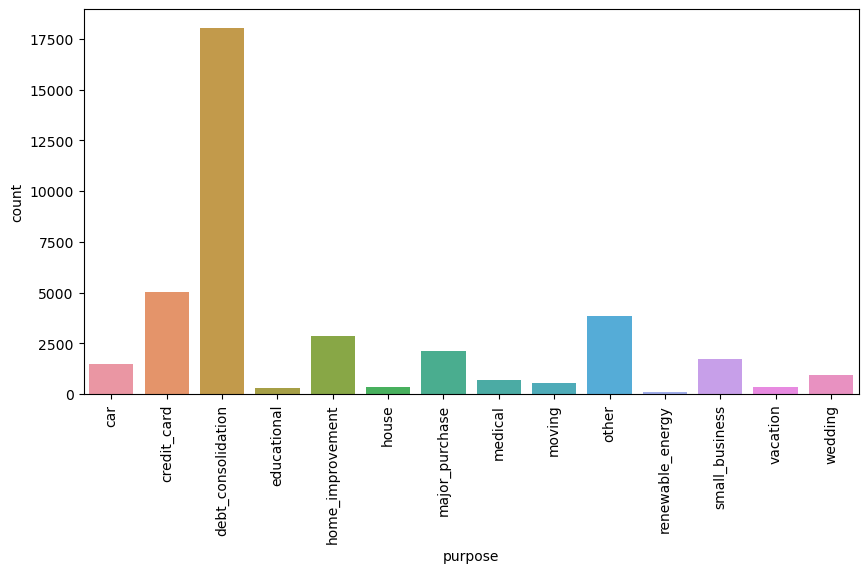

In [111]:
#Purpose 
plt.figure(figsize=(10,5))
sns.countplot(x=loan['purpose'])
plt.xticks(rotation=90)
plt.show()

###  <font color='red'>e)<u> Purpose of getting loan</u></font>
 -> Majority of the loans given fot debt consolidation

<AxesSubplot:ylabel='term'>

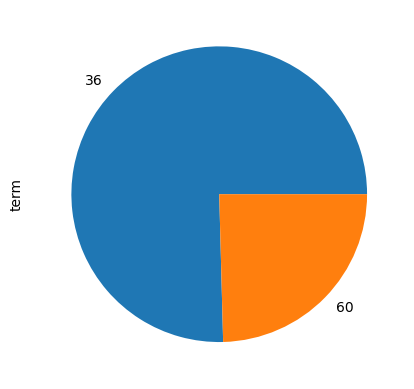

In [113]:
(loan['term'].value_counts(1)*100).plot(kind='pie')

###  <font color='red'>e)<u> Term of loan</u></font>
 -> Majority of the loans given for 36 months period

<AxesSubplot:ylabel='verification_status'>

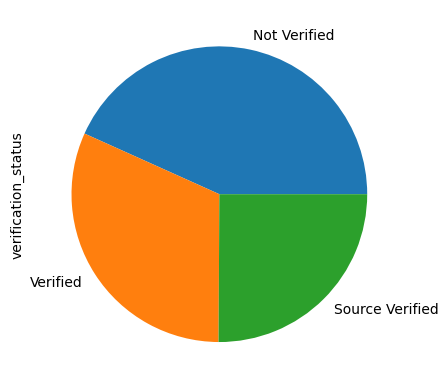

In [115]:
(loan['verification_status'].value_counts(1)*100).plot(kind='pie')

### 2. Segmented Univariate Analysis

Segmented Univariate Analysis is one of the simplest form of visualization to analyze data. In its name ‘Uni’ means one which itself describes that it considers only a single data variable for analysis. analysis. Segmented analysis here means that the data variable is analyzed in subsets and is very useful as it can show the change metric in pattern across the different segments of the same variable.

In [69]:
# Let us consider the purose for whcih they have applied load vs loan status
loan['purpose'].describe()

count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object

In [70]:
loan['loan_status'].describe()

count          38577
unique             2
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

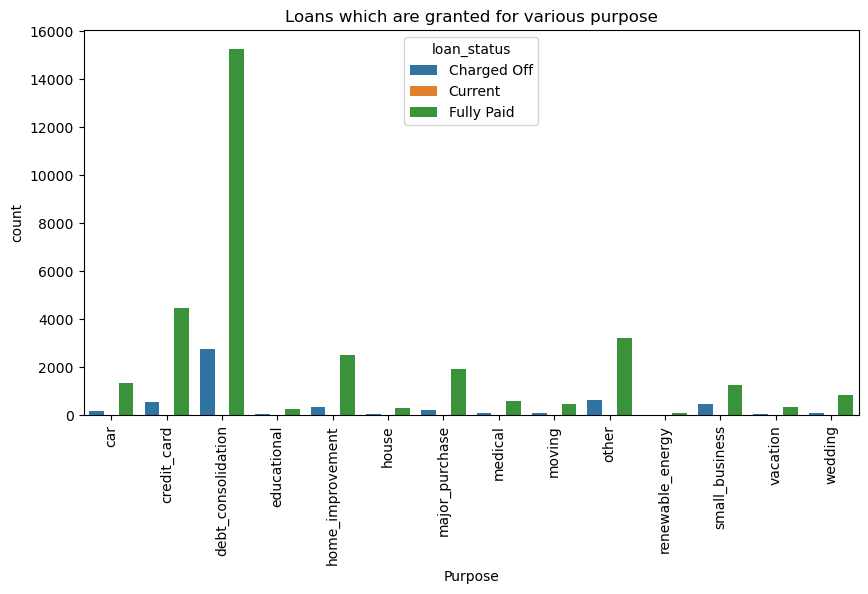

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', hue='loan_status', data=loan)
plt.title('Loans which are granted for various purpose')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> From the above analysis it is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.

In [72]:
# Next we can check term and the purpose to get some inights on it.
loan['term'].describe()

count    38577.000000
mean        41.898437
std         10.333136
min         36.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

In [73]:
loan['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

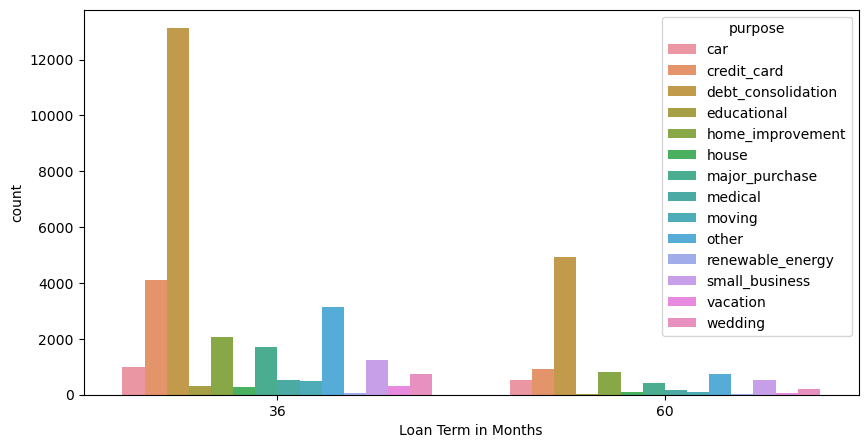

In [74]:
plt.figure(figsize=(10,5))
sns.countplot( x="term", hue='purpose', data=loan)
plt.xlabel('Loan Term in Months')
plt.show()

###  <font color='red'><u>insights</u></font>
    - > For the purpose of debt consolidation people get more loans and term is 36 months
    


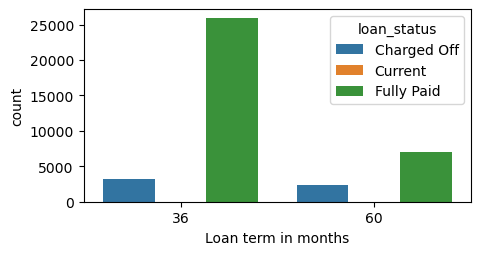

In [75]:
# let us check the term and loan status to get some insights
plt.figure(figsize=(5,2.5))
sns.countplot( x="term", hue='loan_status', data=loan)
plt.xlabel('Loan term in months')
plt.show()

###  <font color='red'><u>insights</u></font>
    - > Percentage of defaulters in the term of 36 months is higher than 60 months
    


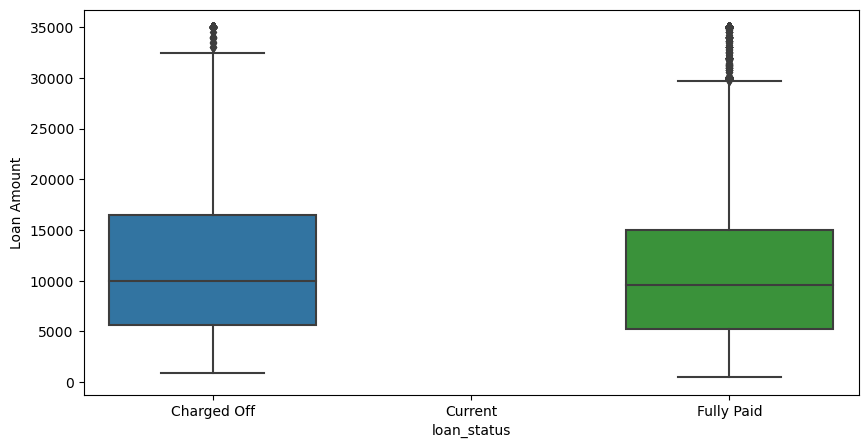

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan)
plt.ylabel('Loan Amount')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> Mean of both Charged off and Fully Paid are same.
    ->  25% and 75% Loan amount of Fully paid and charged off are nearly equal
    
    

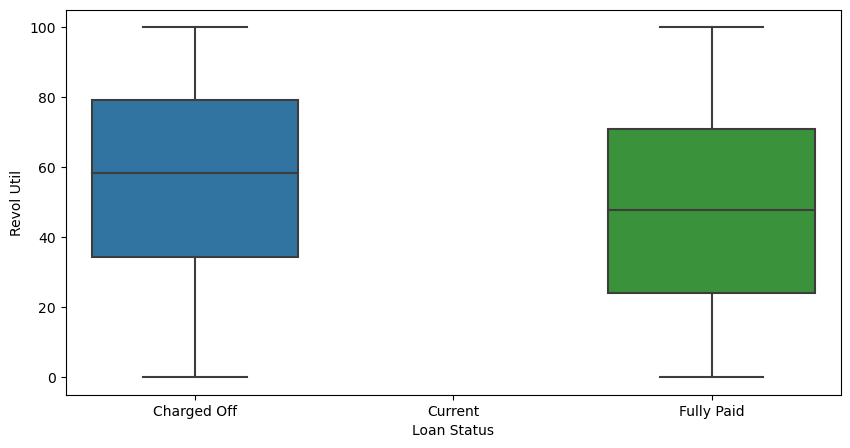

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot( y="revol_util", x='loan_status' , data=loan)
plt.xlabel('Loan Status')
plt.ylabel('Revol Util')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> Higher revolving line utilization rate above 58% increase the risk of defaulting the loan.

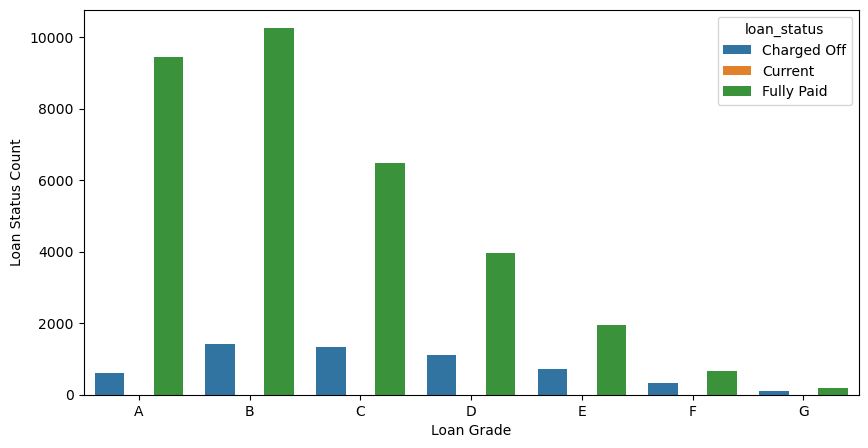

In [78]:
plt.figure(figsize=(10,5))
sns.countplot( x='grade', hue='loan_status', data=loan)
plt.xlabel('Loan Grade')
plt.ylabel('Loan Status Count')
plt.show()

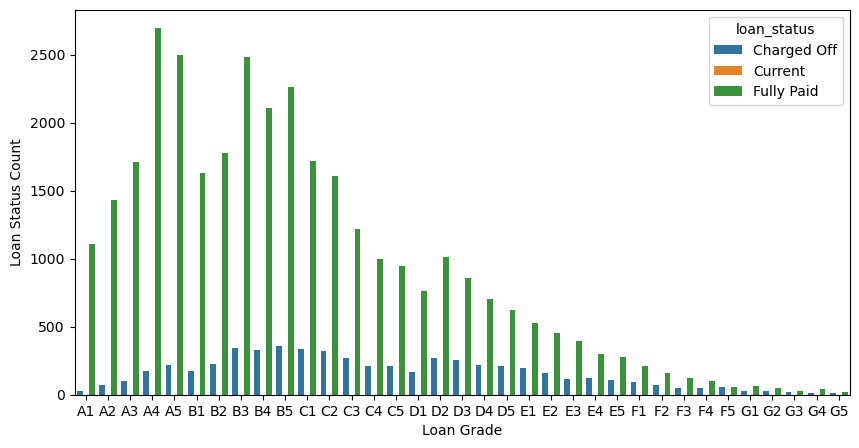

In [79]:
plt.figure(figsize=(10,5))
sns.countplot( x='sub_grade', hue='loan_status', data=loan)
plt.xlabel('Loan Grade')
plt.ylabel('Loan Status Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> B,C D loan have more charged off
    
    

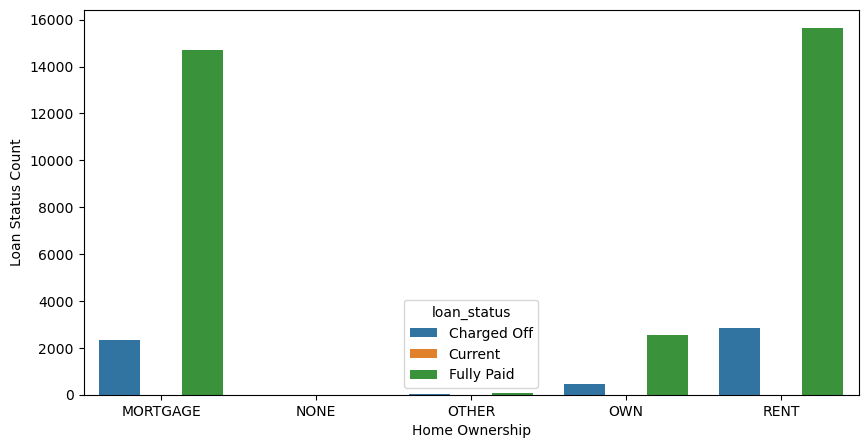

In [80]:
plt.figure(figsize=(10,5))
sns.countplot( x='home_ownership', hue='loan_status', data=loan)
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> People who are in the rented house are more likely to default the loan which is a risk factor
    
    
    

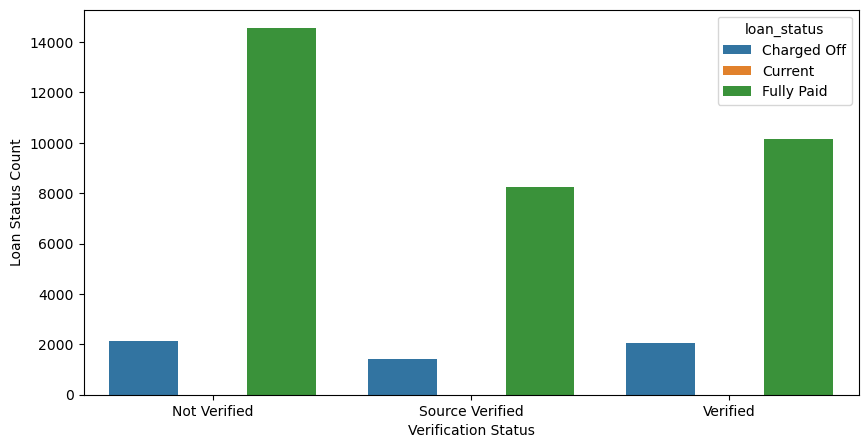

In [81]:
plt.figure(figsize=(10,5))
sns.countplot( x='verification_status', hue='loan_status', data=loan)
plt.xlabel('Verification Status')
plt.ylabel('Loan Status Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> From the above graph we get to know that both verified ad non verified peoples loan are equally defaulted, from this we get to that we need to look into the verification process.
    

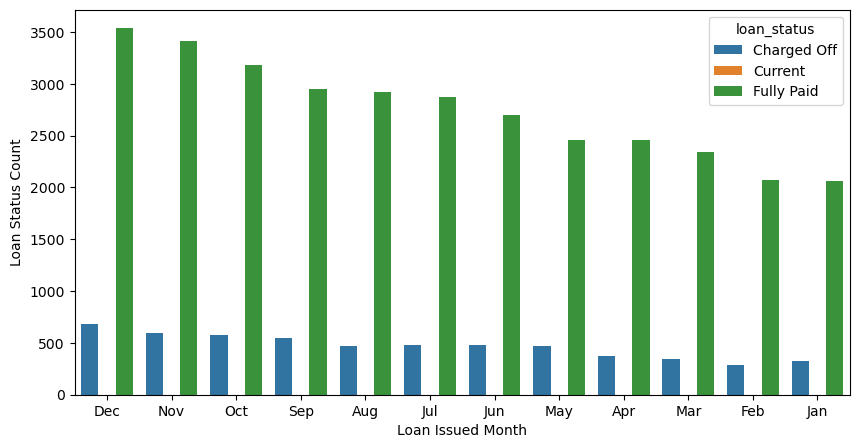

In [82]:
plt.figure(figsize=(10,5))
sns.countplot( x='issue_m', hue='loan_status', data=loan)
plt.xlabel('Loan Issued Month')
plt.ylabel('Loan Status Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> Loan issued in the month of DEC, SEP, MAY are more risker

### 3. Bivariate Analysis

Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association.


In [83]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tax_liens,issue_m,issue_y,earliest_cr_line_m,earliest_cr_line_y,last_credit_pull_m,last_credit_pull_y,last_pymnt_m,last_pymnt_y,annual_inc_lakhs
0,1077501.0,1296599.0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,...,0.0,Dec,11,Jan,85,May,16,Jan,15,24.000
1,1077430.0,1314167.0,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,...,0.0,Dec,11,Apr,99,Sep,13,Apr,13,30.000
2,1077175.0,1313524.0,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,...,0.0,Dec,11,Nov,1,May,16,Jun,14,12.252
3,1076863.0,1277178.0,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,...,0.0,Dec,11,Feb,96,Apr,16,Jan,15,49.200
5,1075269.0,1311441.0,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,...,0.0,Dec,11,Nov,4,Jan,16,Jan,15,36.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187.0,92174.0,2500.0,2500.0,1075.0,36,8.07,78.42,A,A4,...,NaN,Jul,7,Nov,90,Jun,10,Jul,10,110.000
39713,90665.0,90607.0,8500.0,8500.0,875.0,36,10.28,275.38,C,C1,...,NaN,Jul,7,Dec,86,Jul,10,Jul,10,18.000
39714,90395.0,90390.0,5000.0,5000.0,1325.0,36,8.07,156.84,A,A4,...,NaN,Jul,7,Oct,98,Jun,07,Apr,08,100.000
39715,90376.0,89243.0,5000.0,5000.0,650.0,36,7.43,155.38,A,A2,...,NaN,Jul,7,Nov,88,Jun,07,Jan,08,200.000


In [84]:
loan['collections_12_mths_ex_med'].value_counts()

0.0    38521
Name: collections_12_mths_ex_med, dtype: int64

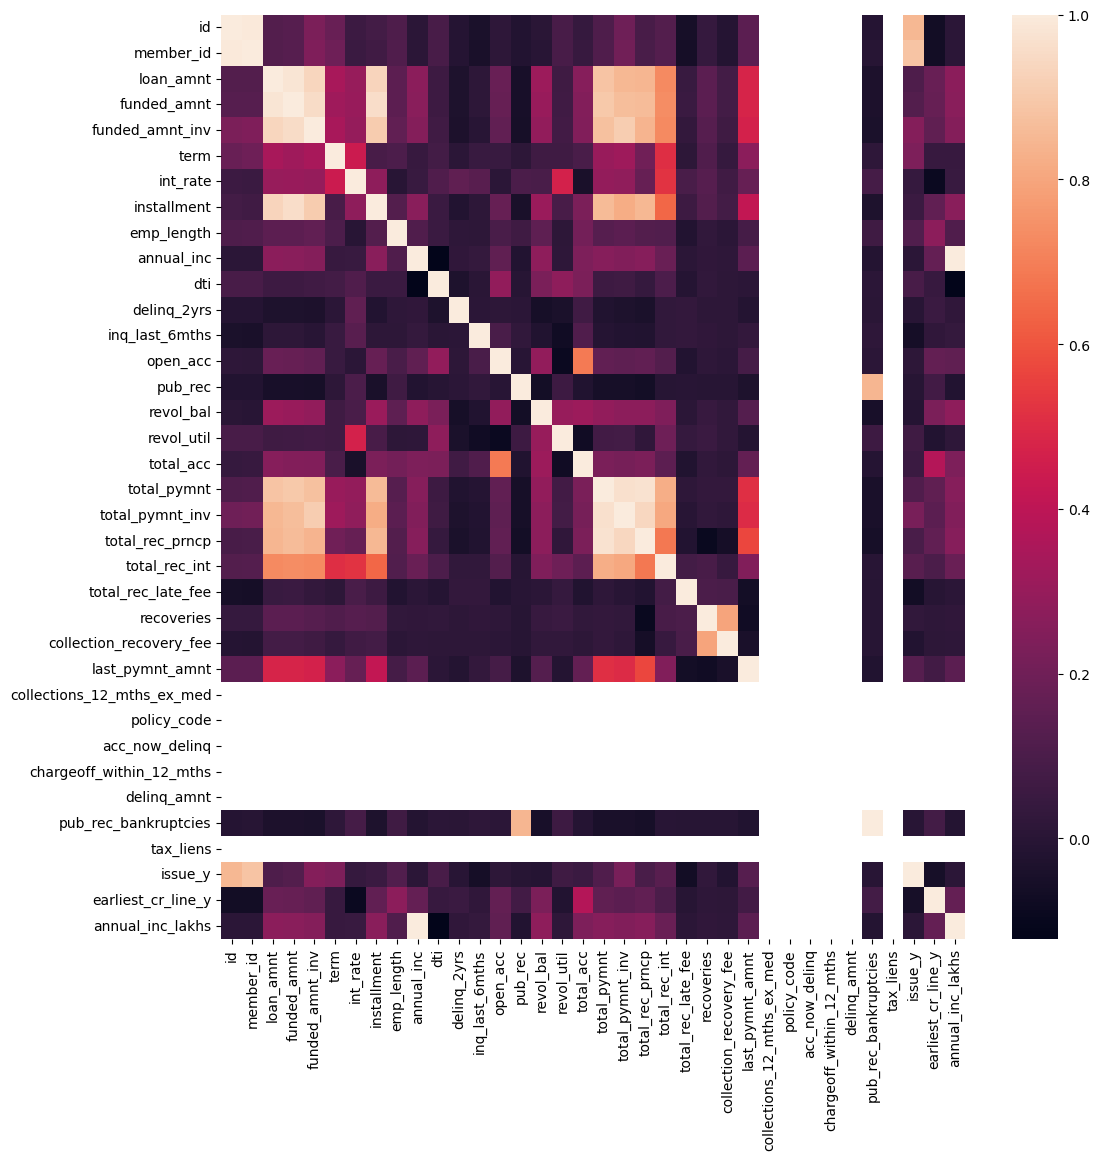

In [85]:
#Let us first check the correlation map of the given data

plt.figure(figsize=(12,12))
sns.heatmap(loan.corr())
plt.show()

In [86]:
loan['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

In [87]:
# change the value of loan status to binary for easier calculation
# set 1 for Charged Off loans and 0 for completed loans
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan['loan_status_num'].value_counts()

0    32950
1     5627
Name: loan_status_num, dtype: int64

In [88]:
plt.figure(figsize=(8,8))
g_data = loan.groupby('issue_y')['loan_status_num'].count()
g_data

issue_y
7       251
8      1562
9      4716
10    11532
11    20516
Name: loan_status_num, dtype: int64

<Figure size 800x800 with 0 Axes>

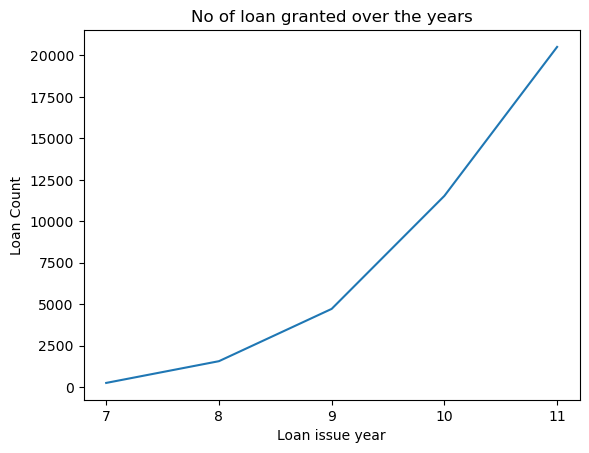

In [89]:
g_data.plot.line(x_compat=True)
plt.xticks(np.arange(min(g_data.index), max(g_data.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan issue year')
plt.ylabel('Loan Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> From the above graph we get to known that loan given over the years have been increased
    

In [90]:
loan['installment'].value_counts()

311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
          ..
587.33     1
518.72     1
51.91      1
835.09     1
255.43     1
Name: installment, Length: 15022, dtype: int64

In [91]:
loan['annual_inc_lakhs'].value_counts()

60.000     1466
50.000     1029
40.000      855
45.000      811
30.000      808
           ... 
80.569        1
82.116        1
242.400       1
133.300       1
27.376        1
Name: annual_inc_lakhs, Length: 5215, dtype: int64

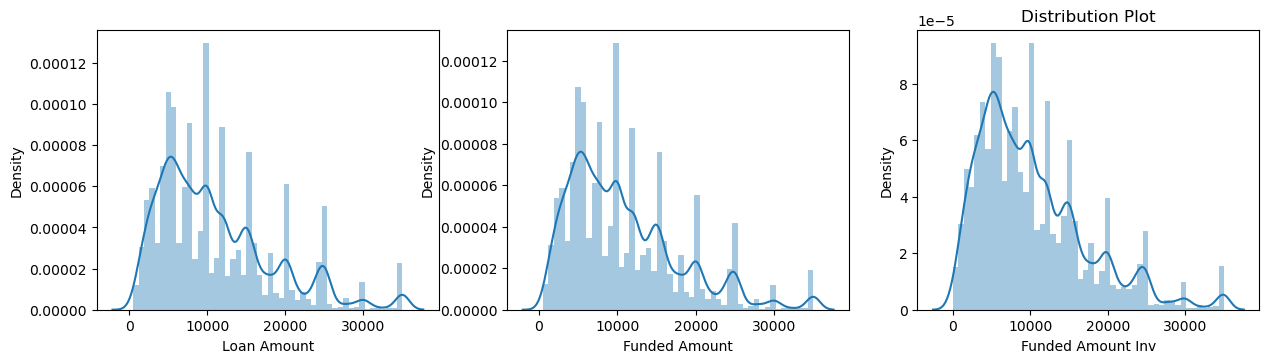

In [92]:
plt.figure(figsize=(15,8))

plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'])
ax.set_xlabel('Loan Amount')

plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'])
ax.set_xlabel('Funded Amount')

plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'])
ax.set_xlabel('Funded Amount Inv')

plt.title('Distribution Plot')
plt.show()

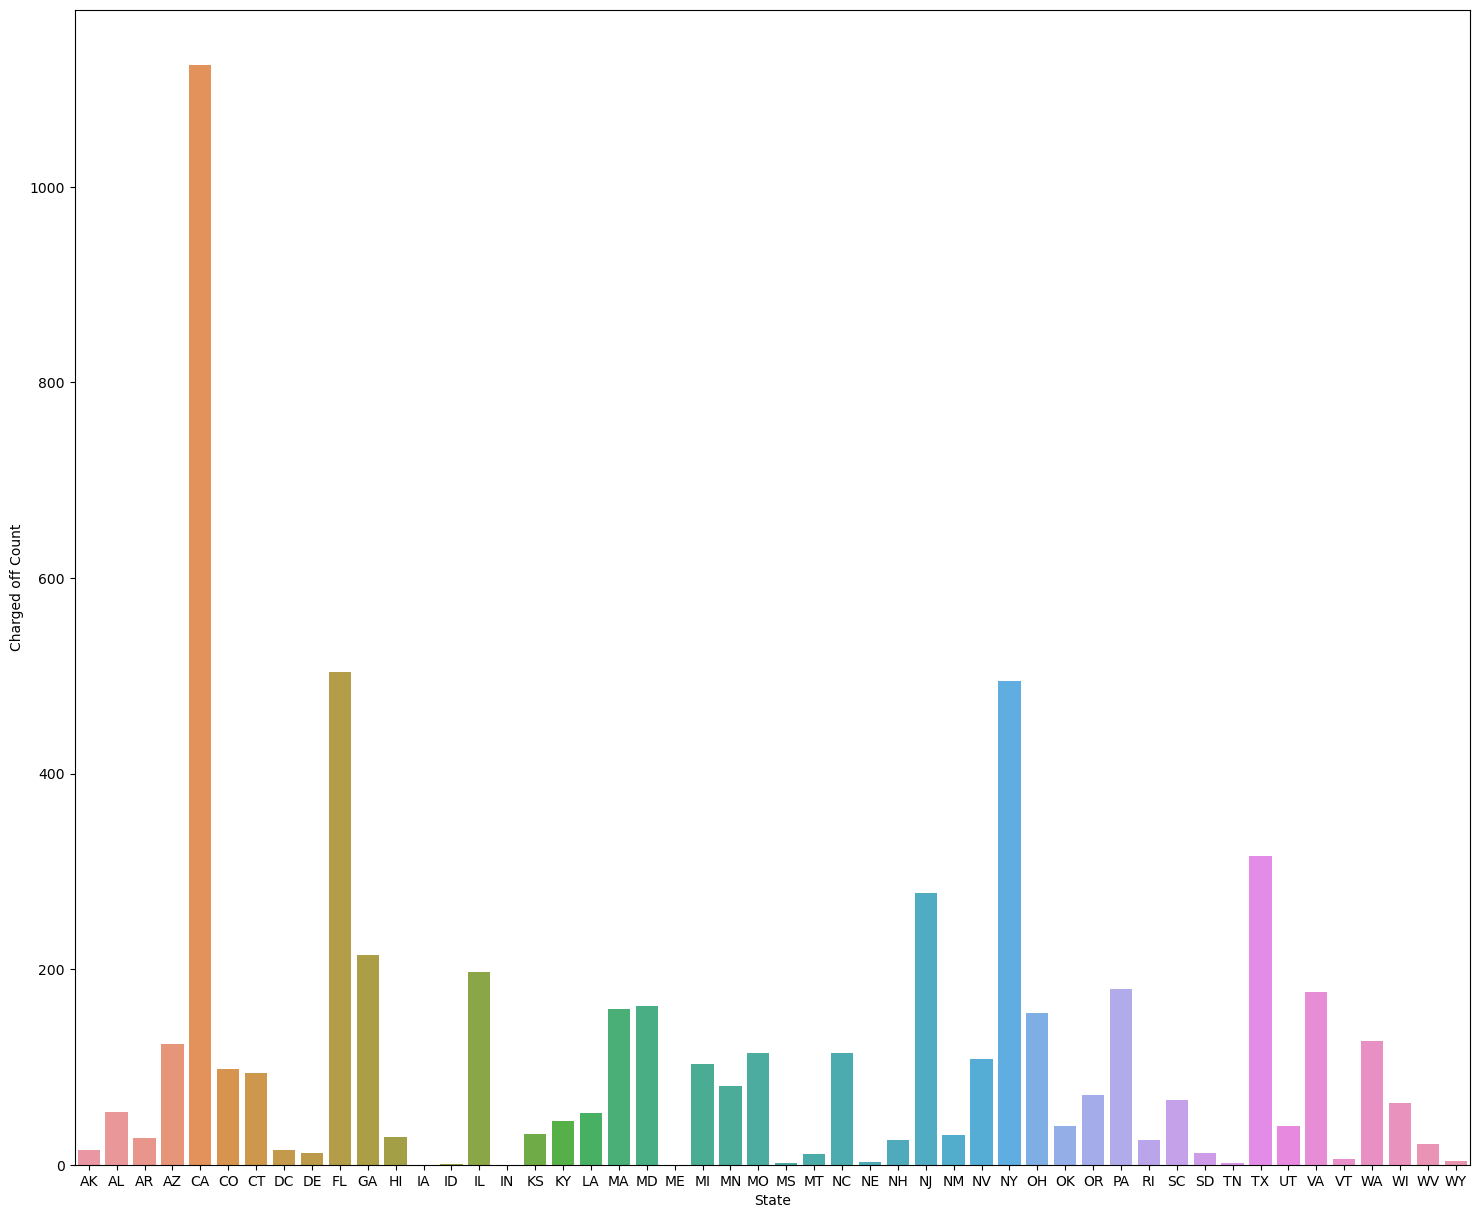

In [93]:
g = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(18,15))
sns.barplot(x='addr_state', y='loan_status', data=g)
plt.xlabel('State')
plt.ylabel('Charged off Count')
plt.show()

###  <font color='red'><u>insights</u></font>
    -> People from CA are not paying the loan back , Charge off loan is high in that state
    

###  <font color='red'><u>Conclusion </u></font>

From the EDA of the given loan data set we got to known that multiple factors depend on the driving factors. However, according to me some of the impactful factors are .

#### Lesser Risk

-> Applicant’s address state FL, NY, TX have some lesser amount of impact of defaulting loan. <br>
-> Higher loan amount increases the risk.<br>
-> From the above graph we get to know that both verified ad non verified peoples loan are equally defaulted, from this we get to that we need to look into the verification process.<br>
-> Loan issue month int the Month Dec, May, Sep

#### Higher Risk

-> Loan grade and sub-grade from D to G.<br>
-> Loan purpose increases the risk some purposes are small business, renewable energy, educational.<br>
-> Percentage of defaulters in the term of 36 months is higher than 60 months.<br>
-> Higher interest rate above 13%.<br>
-> People who are in the rented house are more likely to default the loan which is a risk factor.<br>
-> Higher revolving line utilization rate above 58% increase the risk of defaulting the loan.<br>
-> High loan amount and the high interest rate for lower income group.<br>
-> More number of installment and longer repayment term.<br>
-> People who are in the rented house are more likely to default the loan which is a risk factor<br>
-> People who Reside in the CA are more likely to default the loan.<br>